**Mamadou DIOUF**


---




## OPTIMIZATION PROJECT: Antennas



In a region $Ω$ of $\mathbb{R}^2$ consider $K$ antennas at coordinates $a_k\in \mathbb{R}^2 $, $1 \leq k \leq K$ .At a point $x \in \mathbb{R}^2$ assume that the strength of the signal received from antenna $k$ is

$\hspace{23mm}1/(1 + ∥x - a_k∥^2)$.

Fix $T$ “target locations” $b_1, ..., b_T \in \mathbb{R}^2$. We want all targets to be “well covered by the antennas” : the goal is to find the best place to install a new antenna, so that the minimal signal strength among
all target locations is the highest possible

PS: better view with google colab, you have to add the antennas data in your drive


# Antennas data exploration

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import re
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
antennas = pd.read_csv('/content/drive/MyDrive/antennes-relais.csv', sep=';')
antennas.head()

,Code site,Adresse,Opérateur,Mise en service,Mise en service 4G,Mise en service 5G - 3500,Mise en service 5G - 700,Type,Arrondissement,geo_shape,geo_point_2d
0,T15392,3 place DES PYRAMIDES,BOUYGUES,2014-12-31,NaN,2023-06-29,NaN,NaN,75001,"{""coordinates"": [2.3321429998658014, 48.864114...","48.86411400009866, 2.3321429998658014"
1,T07523,2 RUE DE LA MONNAIE,BOUYGUES,NaN,NaN,NaN,NaN,NaN,75001,"{""coordinates"": [2.3429789994974906, 48.859191...","48.85919100004075, 2.3429789994974906"
2,T15526,30 rue DE GRAMONT,BOUYGUES,2015-07-07,NaN,2021-07-18,NaN,NaN,75002,"{""coordinates"": [2.3371750622205965, 48.871161...","48.8711616541825, 2.3371750622205965"
3,T10573,5-7 rue RATAUD,BOUYGUES,1996-05-31,NaN,2022-01-12,NaN,NaN,75005,"{""coordinates"": [2.345650744498304, 48.8411421...","48.84114214591115, 2.345650744498304"
4,T15959,75 rue D'AMSTERDAM,BOUYGUES,2015-05-02,NaN,2022-03-16,NaN,NaN,75008,"{""coordinates"": [2.3269994997615875, 48.881663...","48.88166399999357, 2.3269994997615875"


In [ ]:
antennas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Code site                  2014 non-null   object 
 1   Adresse                    2014 non-null   object 
 2   Opérateur                  2014 non-null   object 
 3   Mise en service            1530 non-null   object 
 4   Mise en service 4G         997 non-null    object 
 5   Mise en service 5G - 3500  1255 non-null   object 
 6   Mise en service 5G - 700   0 non-null      float64
 7   Type                       999 non-null    object 
 8   Arrondissement             2014 non-null   int64  
 9   geo_shape                  2014 non-null   object 
 10  geo_point_2d               2014 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 173.2+ KB


In [ ]:
antennas.describe()

,Mise en service 5G - 700,Arrondissement
count,0.0,2014.000000
mean,NaN,75013.785005
std,NaN,10.666090
min,NaN,75001.000000
25%,NaN,75010.000000
50%,NaN,75014.000000
75%,NaN,75017.000000
max,NaN,75116.000000


In [ ]:
antennas_2d = []
for i in antennas['geo_point_2d']:
  a=re.split(",",i)
  antennas_2d.append([float(a[0]),float(a[1])])


antennas_2d_pd = pd.DataFrame(antennas_2d,columns=['x','y'])
antennas_2d_pd.describe()

,x,y
count,2014.000000,2014.000000
mean,48.859447,2.338876
std,0.020205,0.040597
min,48.816963,2.231147
25%,48.842943,2.307213
50%,48.859146,2.339734
75%,48.875609,2.370524
max,48.901869,2.463828


In [ ]:
antennas_2d_pd.head(20)

,x,y
0,48.864114,2.332143
1,48.859191,2.342979
2,48.871162,2.337175
3,48.841142,2.345651
4,48.881664,2.326999
5,48.873339,2.337678
6,48.878144,2.337272
7,48.870622,2.329975
8,48.879297,2.354643
9,48.874483,2.354608


In [ ]:
antennas['geo_shape'][1]

'{"coordinates": [2.3429789994974906, 48.85919100004075], "type": "Point"}'

In [ ]:
antennas_2d_pd.loc[antennas_2d_pd['x']>48.90]


,x,y
116,48.900393,2.352357
144,48.900249,2.334812
725,48.901680,2.385243
1096,48.900069,2.328619
1220,48.900528,2.345593
1269,48.900151,2.352525
1450,48.901869,2.373039
1724,48.900149,2.352288


In [ ]:
antennas_2d_pd.loc[antennas_2d_pd['x']<48.82]

,x,y
34,48.819635,2.344879
523,48.819924,2.359499
593,48.817602,2.360245
614,48.816963,2.334573
786,48.819951,2.355340
1203,48.818060,2.365919
1207,48.819798,2.372256
1326,48.819637,2.345115
1463,48.819231,2.362748
1711,48.819771,2.358972


In [ ]:
antennas_2d_pd.loc[antennas_2d_pd['y']<2.24]

,x,y
988,48.860094,2.231383
1306,48.860093,2.231147


In [ ]:
antennas_2d_pd.loc[antennas_2d_pd['y']>2.46]

,x,y
363,48.826813,2.463828
707,48.826968,2.463827
1377,48.826967,2.463591


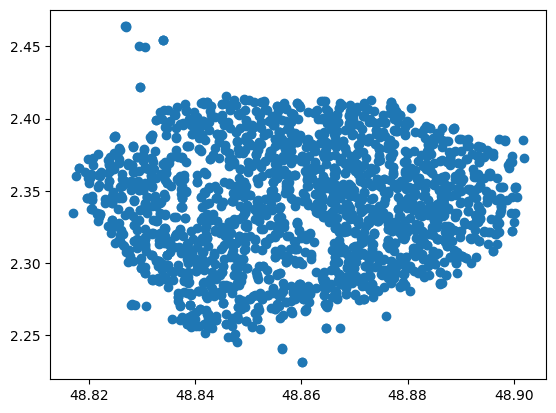

In [ ]:
plt.scatter(antennas_2d_pd['x'],antennas_2d_pd['y'])
plt.show()

Set of antena's positions

In [ ]:
Antennas=[[48.816963,2.334573],[48.819635,2.344879],[48.819231,2.362748],[48.901869,	2.373039],[48.900069,2.328619],[48.860093,2.231147
],[48.860094,2.231383],[48.826813,2.463828],[48.859191,2.342979],[48.833712,2.399733]]

In [ ]:
len(Antennas)

10

# signal_strength function

In [ ]:
def signal_strength(a,x):

  return 1/(1+np.linalg.norm(x-a)**2)

Examples

In [ ]:
signal_strength(antennas_2d[363],np.array([48.4,2.4]))

0.8429975424006755

In [ ]:
signal_strength(antennas_2d[1450],np.array([48.4,2.4]))


0.7983398436848702

In [ ]:
signal_strength(antennas_2d[10],np.array([48.4,2.4]))


0.8385023401666306

# total_signal_strength

In [ ]:
def total_signal_strength(A,x):
  total = 0
  for a in A:
    total += signal_strength(np.array(a),x)
  return total

Examples

In [ ]:
total_signal_strength(antennas_2d[:5],np.array([1,2]))

0.0021814786471258665

In [ ]:
total_signal_strength(antennas_2d[:5],np.array([48.4,2.4]))

4.102241747328987

In [ ]:
total_signal_strength(antennas_2d[:10],np.array([48.4,2.4]))
#

8.17004030285636

# Plotting contour lines of antena's set

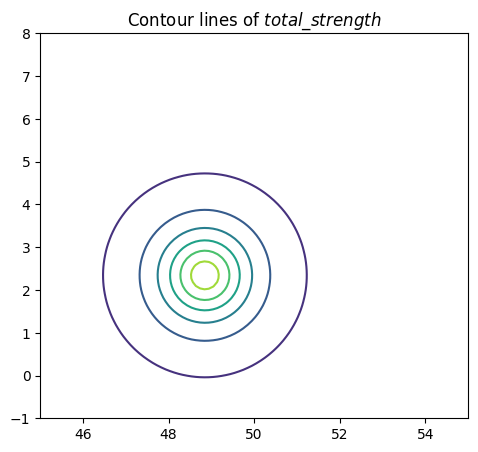

In [ ]:
import matplotlib.pyplot as plt


aX0=np.linspace(45,55,100)
aX1=np.linspace(-1,8,100)
Z=np.array([[total_signal_strength(Antennas,np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.figure(figsize=(10,5))
plt.contour(aX0,aX1,Z,) #trace les lignes de niveaux de la fonction fa
plt.title("Contour lines of $total\_strength$")
plt.axis("scaled")
plt.show()



# min_strength_at_targets

In [ ]:
A=Antennas+antennas_2d[:5] #a set of antennas positions
A_array = np.array(A)

In [ ]:
A

[[48.816963, 2.334573],
 [48.819635, 2.344879],
 [48.819231, 2.362748],
 [48.901869, 2.373039],
 [48.900069, 2.328619],
 [48.860093, 2.231147],
 [48.860094, 2.231383],
 [48.826813, 2.463828],
 [48.859191, 2.342979],
 [48.833712, 2.399733],
 [48.86411400009866, 2.3321429998658014],
 [48.85919100004075, 2.3429789994974906],
 [48.8711616541825, 2.3371750622205965],
 [48.84114214591115, 2.345650744498304],
 [48.88166399999357, 2.3269994997615875]]

set of locations

In [ ]:
locations =[[48.83,2.27],[48.84,2.31],[48.8405,2.4103],[48.8502,2.4603],[48.87,2.21],[48.9,2.49]]
locations_array = np.array(locations)

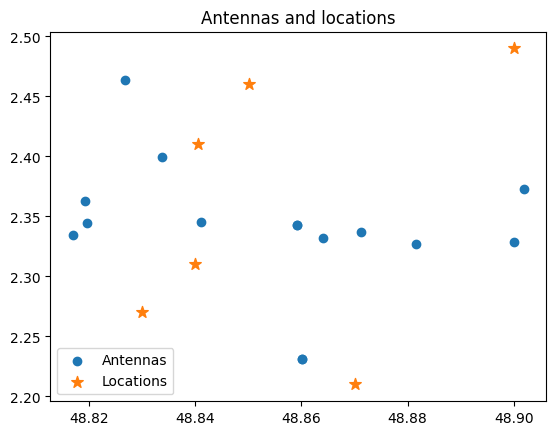

In [ ]:
plt.scatter(A_array[:,0],A_array[:,1])
plt.scatter(locations_array[:,0],locations_array[:,1], marker='*',s=75)
plt.title("Antennas and locations")
plt.legend(['Antennas','Locations'])
plt.show()

In [ ]:
def min_strength_at_targets(antennas,locations):
  #print(antennas)
  totals= [total_signal_strength(antennas,location) for location in locations]

  return locations[np.argmin(totals)],min(totals) # argmin and min

Examples antennas A and locations

In [ ]:
min_strength_at_targets(A,locations)

([48.9, 2.49], 14.590754698070802)

We want all targets to be “well covered by the antennas” : the goal is to find the best place to install a new antenna, so that the minimal signal strength among all target locations is the highest possible.

So we can write down the problem to solve as :

$\displaystyle \max_{x\in \Omega} \min_{i\in[1;T]}\Bigg(\dfrac{1}{1 + ∥b_i - x∥^2}+\sum_{k=1}^{K}\dfrac{1}{1 + ∥b_i - a_k∥^2}\Bigg) \iff$

$ \displaystyle \min_{x\in \Omega} -\min_{i\in[1;T]}\Bigg(\dfrac{1}{1 + ∥b_i - x∥^2}+\sum_{k=1}^{K}\dfrac{1}{1 + ∥b_i - a_k∥^2}\Bigg) $
---



#The optimization problem

This problem is not smooth because we want to maximize a minimum which is not continuous.

#Rewritting the problem

We can rewrite the problem $\displaystyle \min_{x\in \Omega} -\min_{i\in[1;T]}\Bigg(\dfrac{1}{1 + ∥b_i - x∥^2}+\sum_{k=1}^{K}\dfrac{1}{1 + ∥b_i - a_k∥^2}\Bigg)$ as :

$\displaystyle \min_{z} -z$ such that  $ \displaystyle z \leq \min_{i\in[1;T]}\Bigg(\dfrac{1}{1 + ∥b_i - x∥^2}+\sum_{k=1}^{K}\dfrac{1}{1 + ∥b_i - a_k∥^2}\Bigg) $ and $x\in \Omega$

 And we obtain the smooth problem :
    
$\displaystyle \min_{z\in \mathbb{R}^*_+, x\in \Omega}  -z$

$\text{subject to } \displaystyle      z \leq \Bigg(\dfrac{1}{1 + ∥b_1 - x∥^2}+\sum_{k=1}^{K}\dfrac{1}{1 + ∥b_1 - a_k∥^2}\Bigg)$

$\hspace{25mm}\vdots\hspace{49mm}\vdots $

$\hspace{25mm} \displaystyle z \leq \Bigg(\dfrac{1}{1 + ∥b_T - x∥^2}+\sum_{k=1}^{K}\dfrac{1}{1 + ∥b_T - a_k∥^2}\Bigg) $

Which is equivalent to:

$\displaystyle \min_{z\in \mathbb{R}^*_+, x\in \Omega}  -z$

$\text{subject to }\displaystyle       h_i(z,x) \leq 0$
    
$\text{where } \displaystyle h_i(z,x) = z - \dfrac{1}{1 + ∥b_i - x∥^2}-\sum_{k=1}^{K}\dfrac{1}{1 + ∥b_i - a_k∥^2}$
    

# Solve the smooth optimization problem with scipy

Let $\displaystyle f(z,x) =-z$, for $z\in \mathbb{R}_+^*$ and $x\in \Omega$ be our objective function.

And let  $\displaystyle h_i(z,x) = z - \dfrac{1}{1 + ∥b_i - x∥^2}-\sum_{k=1}^{K}\dfrac{1}{1 + ∥b_i - a_k∥^2}$

$i \in I$ be our constraints functions.

 In $\textbf{scipy.optimize}$, $\textbf{minimize}$  provides a way to minimize a scalar function of one or more variables. We provide it with the following arguments: objective function, initial guess for $z$ and $x$, constraints functions, optimization method, bounds...

In [ ]:
import numpy as np
from scipy.optimize import minimize, NonlinearConstraint

def objective_function(zx):
    """
    Objective function: Minimize -z
    """
    z, x = zx[0], zx[1:]  # Split the input into z and x
    return -z

def constraint_fun(zx, b_t, A):
    """
    Constraint function:
        z <= 1 / (1 + ||b_t - x||^2) + sum(1 / (1 + ||b_t - a_k||^2) for k in range(K))
    """
    z, x = zx[0], zx[1:]  # Split the input into z and x
    term1 = 1 / (1 + np.linalg.norm(b_t - x)**2)
    term2 = total_signal_strength(A,b_t)
    return z - (term1 + term2)

# Create a list of NonlinearConstraint objects
constraints = []
for b_t in locations:
    constraints.append(NonlinearConstraint(
        lambda zx: constraint_fun(zx, b_t, A),  # Pass zx as a single argument
        -np.inf,
        0
    ))

# Initial guess for z and x
x0 = np.mean(locations, axis=0)
z0 = 0  # Initial guess for z
zx0 = np.concatenate([np.array([z0]), x0])  # Combine z and x into a single array

# Minimize the objective function
result = minimize(objective_function,
                 x0=zx0,  # Initial guess for z and x
                 constraints=constraints)

print("Optimal solution:")
print("z:", result.x[0])
print("x:", result.x[1:])  # Extract x from the result
print("Minimum value:", result.fun)

Optimal solution:
z: 15.590754699246038
x: [48.89999245  2.48997782]
Minimum value: -15.590754699246038


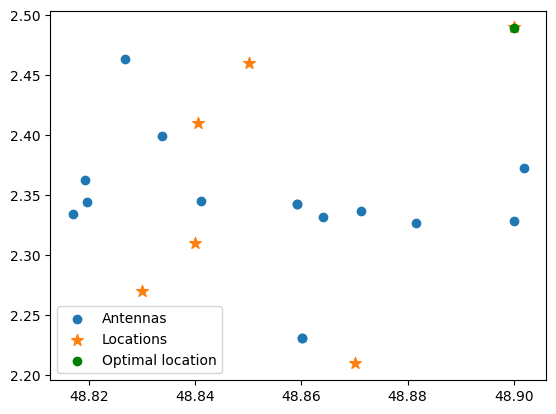

In [ ]:
fig, ax = plt.subplots()
ax.scatter(A_array[:,0],A_array[:,1])
locations_array = np.array(locations)
ax.scatter(locations_array[:,0],locations_array[:,1], marker='*',s=75)
ax.scatter(result.x[1:][0],result.x[1:][1],c='green')
plt.legend(['Antennas','Locations','Optimal location'])
plt.show()

In [ ]:
# Minimize the objective function
result = minimize(objective_function,
                 x0=zx0,  # Initial guess for z and x
                 constraints=constraints,bounds=((0,None),(45,48),(0,3)))

print("Optimal solution:")
print("z:", result.x[0])
print("x:", result.x[1:])  # Extract x from the result
print("Minimum value:", result.fun)

Optimal solution:
z: 15.143240918587663
x: [48.          2.48999971]
Minimum value: -15.143240918587663


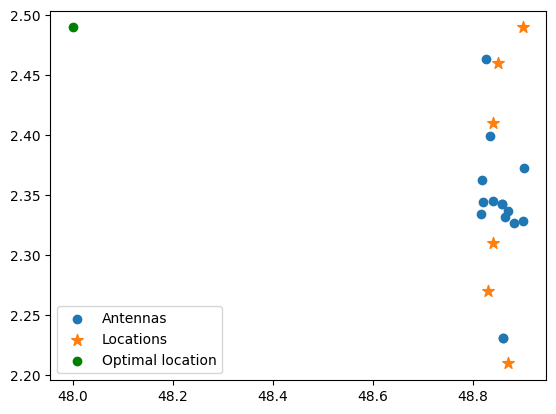

In [ ]:
fig, ax = plt.subplots()
ax.scatter(A_array[:,0],A_array[:,1])
locations_array = np.array(locations)
ax.scatter(locations_array[:,0],locations_array[:,1], marker='*',s=75)
ax.scatter(result.x[1:][0],result.x[1:][1],c='green')
plt.legend(['Antennas','Locations','Optimal location'])
plt.show()

##CONCLUSION

If the location of the minimum total signal is in the bound then it will be the solution. Otherwise, the solution will be a point in the bound.